Привет, Ирина!

Меня зовут Вячеслав Погорелый, и я буду проводить ревью твоего проекта. 

Предлагаю перейти на "ты", если не против)

Но если это не удобно - дай знать, и мы перейдем на "вы". Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Я отметил комментарии и замечания разным цветом далее по тексту markdown:

---    
<div class="alert alert-block alert-danger">
    
### Ошибка
    
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
    
### Совет
    
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
    
### Успех

Все здорово

<div class="alert alert-block alert-success">
 
### Итоговый Комментарий ревьюера
    
#### Успех
    
Спасибо тебе за доработку проекта. Вот теперь я его готов принять. От себя я хочу пожелать успехов в дальнейешей учебе. Ты точно справишься и дальше, я уверен.

<div class="alert alert-block alert-success">
 
# Итоговый Комментарий ревьюера ver.2 
    
#### Успех
    
Спасибо тебе за доработку проекта. Вот теперь я его готов принять. От себя я хочу пожелать успехов в дальнешей учебе. Ты точно справишься и дальше, я уверен.

# Исследование закономерности успешности игр

Заказчиком исследования является интернет-магазин "Стримчик", который продает компьютерные игры по всему миру.
В нашем распоряжении данные из открытых источников. Данные содержат инфомрацию:
- о продаже игр, 
- оценки пользователей и экспертов, 
- жанры 
- платформы (например, Xbox или PlayStation). 

В ходе исследования нужно выявить закономерности определяющие успешность игр. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Спасибо большое за то, что здесь оформлено оглавление к проекту. Так проект выглядит опрятнее

##  Знакомство с данными

In [1]:
pip install missingno 

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Загрузим библиотеки
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import scipy.stats as st
from math import factorial
from scipy.stats import binom, norm
import missingno as msno
import warnings
warnings.filterwarnings("ignore") # отключим предупреждения о возможных ошибках.


#зададим стили для графиков
sns.set_theme(style="white", palette="bright")
#plt.style.use('seaborn-whitegrid')

In [3]:
# откроем датасет
try:
    data_raw = pd.read_csv('files/games.csv') 
except:
    data_raw = pd.read_csv('/datasets/games.csv') 
    
pd.set_option("display.max_columns", None)

data_raw.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Все библиотеки импортированы и проект сохранен в переменную

In [4]:
# Общая информация о наборе данных, индекс, столбцы и тип данных, нулевые значения и использование памяти
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Оценим количество пропущенных значений в каждом столбце
data_raw.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

<AxesSubplot:>

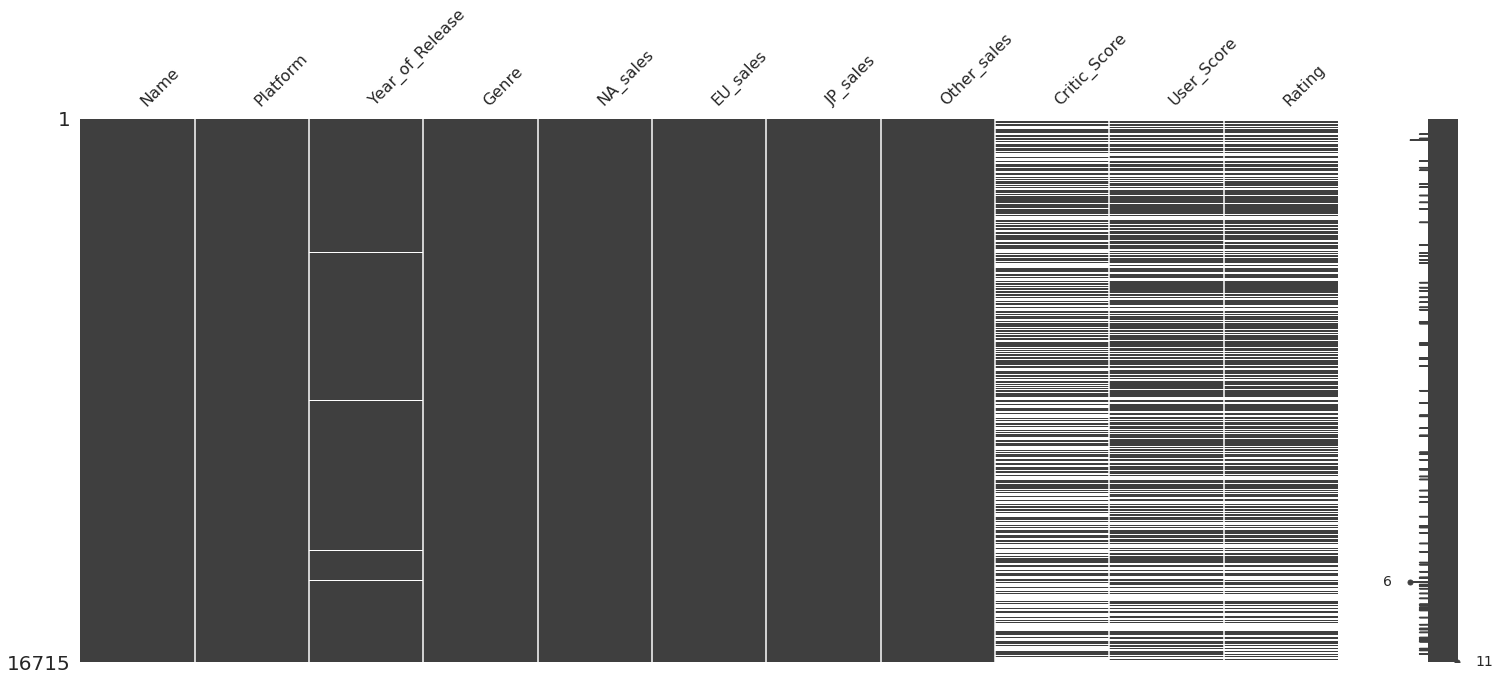

In [6]:
#визуализируем пропуски в данных
msno.matrix(data_raw)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Здорово то, что используешь высокоуровневую библиотеку визуализации пропусков

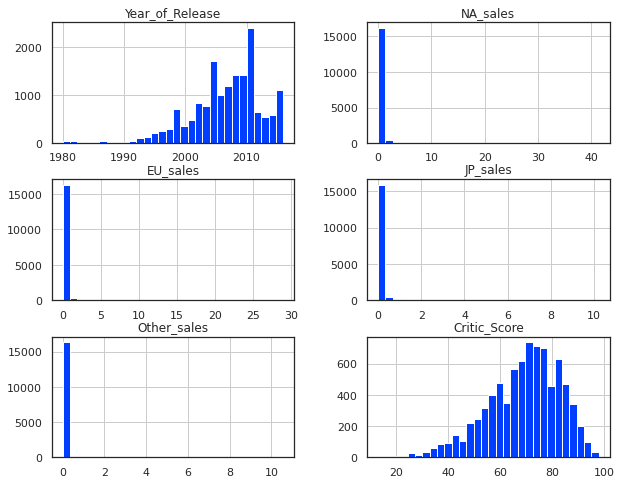

In [7]:
# Визуализируем общие данные
data_raw.hist(figsize=(10, 8), bins= 30)
plt.show()

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для того, чтобы убрать текстовые предупреждения, используй plt.show()

<div class="alert alert-block alert-info">
Вячеслав, привет! Спасибо за совет! Работает!
</div>

Общая предварительная оценка данных:

- набор данных достаточен для анализа
- есть пропуски, аномалии и выбросы
- присутсвуют неправильные типы данных
- названия столбцов не соответсвуют стандартам

Выборка репрезентативна.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Хорошее начало. С данными мы познакомились первично и можем двигаться дальше

##  Предобработка данных

### Изменение названия столбцов

In [8]:
#data_raw = data_raw.rename(columns={'Name': 'name', 
#                            'Platform': 'platform', 
#                            'Year_of_Release': 'year_of_release', 
#                            'Genre': 'genre', 
#                            'NA_sales': 'na_sales',
#                            'EU_sales': 'eu_sales', 
#                            'JP_sales': 'jp_sales', 
#                            'NA_sales': 'na_sales', 
#                            'Other_sales': 'other_sales', 
#                            'Critic_Score': 'critic_score',  
#                            'User_Score': 'user_score', 
#                            'Rating': 'rating', })

data_raw.columns = data_raw.columns.str.lower()

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Советую приводить к нижнему регистру так df.columns = df.columns.str.lower()

<div class="alert alert-block alert-info">
Даже не подумала, что str.lower() можно к названию столбцов применить, а не только к содержимому. 
Так дейстивительно проще, быстрее и вероятность опечаток отсутсвует. Спасибо!
</div>

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Используй на будущее

### Удаление дубликатов

In [9]:
data_raw.duplicated().sum()

0

Явные дубликаты отсутствуют

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
На явные дубликаты мы данные проверили. Отлично

### Исследование и заполнение пропусков



Есть много причин появления пропусков: технические или допущенные пользователями. 

Рассмотрим пропуски подробнее:

In [10]:
# Выведем долю пропущенных значений для каждого столбца датафрейма
pd.DataFrame(data_raw.isna().mean()*100).style.background_gradient('coolwarm')


,0
name,0.011965
platform,0.000000
year_of_release,1.609333
genre,0.011965
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.319174
user_score,40.089740


<b>name, genre</b>

- Предположение: техническая ошибка, пропуски в названии и в жанре взаимосвязаны.

- Стретегия обработки: удалим все строки, в которых не указано название игры

In [11]:
data_raw.shape

(16715, 11)

In [12]:
data = data_raw.dropna(subset=['name'])
data.shape

(16713, 11)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Всего два пропуска и можно даже не задумываясь их удалить. Так будет и лучше, и быстрее

<b>year_of_release</b>

- Пропуски можно восстановить по названию игры, из других источников, но это трудоемкий процесс.
- В названии некоторых игр присутсвует указание года, для этих игр пропуски в годе выпуска возьмем из названия.
- У игр со значением рейтинга пользователей "tbd"  поставим 2016 год, рейтинг пользователей еще не успел сформироваться. О том, что игры свежие также свидетельствуют продажи близкие к нулю. 
- Оставшиеся значения заполним медианным значением, в отличии от среднего это будет целое число не требующее округления и не зависящее от экстремальных значений.

In [13]:
data['year_of_release'].isna().sum()

269

In [14]:
# восcтановим год выпуска из названия игры
for index, row in data.iterrows():
    if np.isnan(row['year_of_release']):
        year = row['name'][-4:]
        
        try: 
            year = int(year)
            if len(str(year)) == 4:
                row['year_of_release'] = year
                data.loc[index] = row
        except: pass

In [15]:
data['year_of_release'].isna().sum()

254

In [16]:
# Количество игр без указания года выпуска и рейтингом tbd
data.query('user_score == "tbd" and year_of_release.isna()').shape

(46, 11)

In [17]:
#Восстановим год выпуска по рейтингу пользователя tbd
data.loc[(data['user_score'] == 'tbd') & (data['year_of_release'].isna()), 'year_of_release'] = 2016

In [18]:
data.query('user_score == "tbd" and year_of_release.isna()').shape

(0, 11)

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
В целом, тут пропусков было тоже мало. Можно было смело удаять, тем более рационально заменить их сложно

In [19]:
#оставшиеся пропуски заменим медианным значением
data.loc[data['year_of_release'].isna(), 'year_of_release'] = data['year_of_release'].median()

In [20]:
data['year_of_release'].isna().sum()

0

<b>user_score </b>

- Причиной пропусков может быть:

            - недавний выход игры (рейтинг в процессе формирования)
            - составители датасета не имели доступа к данным. 

<b>Стратегия заполнения</b>
- Для игр, где известен рейтинг critic_score заменим пропуски в user_score на critic_score с поправкой на шкалу (разделим на 10)

- Значения tdb (to be determined = будет определено) заменим 0 значением, чтобы в дальнейшем выделять данные игры на фоне других

- Оставшиеся пропуски заменим медианным значением в зависимости от жанра игры. 


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Причиня появления пропусков высказаны. Отлично вышло

In [21]:
#Строки с пропусками в user_score и значением в critic_score
data.query('user_score.isna() and not critic_score.isna()').shape

(38, 11)

In [22]:
# Восстановим user_score из critic_score
data.loc[(data['user_score'].isna()) & (~data['critic_score'].isna()), 'user_score'] =data['critic_score']/10

In [23]:
data.query('user_score.isna() and not critic_score.isna()').shape

(0, 11)

In [24]:
# Количество строк, для которых рейтинг еще не определен
data.query('user_score == "tbd"').shape

(2424, 11)

In [25]:
#tdb - заменим на ноль, 
data.loc[data['user_score'] == 'tbd', 'user_score'] = 0

In [26]:
# Оставшиеся пустые значения заменим средним рейтингом в зависимости от жанра игры
# Предварительно изменим тип столбца для корректной работы с ним
data['user_score'] = pd.to_numeric(data['user_score'])
for genre in data['genre'].unique():
    data.loc[data['user_score'].isna(), 'user_score'] = data.loc[(data['genre'] == genre)]['user_score'].mean().round(1)
    print(genre, 'user_score = ', data.loc[(data['genre'] == genre)]['user_score'].mean().round(1))

Sports user_score =  5.1
Platform user_score =  5.4
Racing user_score =  5.1
Role-Playing user_score =  6.2
Puzzle user_score =  3.7
Misc user_score =  4.2
Shooter user_score =  6.1
Simulation user_score =  4.5
Action user_score =  5.6
Fighting user_score =  5.9
Adventure user_score =  5.0
Strategy user_score =  5.8


<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Чтобы убрать красные предупреждения, ты можешь использовать https://sky.pro/media/kak-otklyuchit-preduprezhdeniya-v-python/

<div class="alert alert-block alert-info">
    Ценно! Учла :)
</div>
 

<b>critic_score</b>

- Более 50 процентов данных содержат пропуски в столбце critic_score. 
- Причиной отсутсвия значений помимо технической ошибки при работе с файлом, может быть и то обстоятельство, что далеко не все игры проходили оценку критиками. 

- Стратегия заполнения: 

        
        - заполним средним значением в зависимости от жанра игры.

In [27]:
for genre in data['genre'].unique():
    data.loc[data['critic_score'].isna(), 'critic_score'] = data.loc[(data['genre'] == genre)]['critic_score'].mean().round(0)
    print(genre, 'critic_score = ', data.loc[(data['genre'] == genre)]['critic_score'].mean().round(0) )

Sports critic_score =  72.0
Platform critic_score =  70.0
Racing critic_score =  70.0
Role-Playing critic_score =  72.0
Puzzle critic_score =  70.0
Misc critic_score =  70.0
Shooter critic_score =  71.0
Simulation critic_score =  71.0
Action critic_score =  69.0
Fighting critic_score =  71.0
Adventure critic_score =  70.0
Strategy critic_score =  72.0


<b>rating</b>

ESRB Ratings - компания, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Существует с 1992 года. Соответсвенно игры до этого года не имеют рейтинга от ESRB. Кроме того, ESRB может не иметь полного охвата современных игр. 

Стратегия обработки:
- Введем категорию "NO RATING" для игр с пропусками в данном столбце

In [28]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [29]:
data['rating'] = data['rating'].fillna('NO RATING')

In [30]:
pd.DataFrame(data.isna().mean()*100).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,0.000000
user_score,0.000000


In [31]:
print('Итоги заполнения пропусков:')

print('-'*40)
print ('Все пропуски заполнены')
print ('Всего строк изначально:', len(data_raw))
print ('Всего строк после заполнения:', len(data))
print ('Процент строк, который был удален:', ((len(data_raw) - len(data))/len(data_raw))*100, '%')


Итоги заполнения пропусков:
----------------------------------------
Все пропуски заполнены
Всего строк изначально: 16715
Всего строк после заполнения: 16713
Процент строк, который был удален: 0.011965300628178284 %


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тут отлично вышло. Данные проработали касаемо пропусков. Идем далее 

###  Изменение типа данных

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 2.0+ MB


In [33]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000
mean,2006.517681,0.263302,0.145045,0.077625,0.047343,70.523664,5.283665
std,5.850146,0.813565,0.503359,0.308871,0.186742,9.842564,2.575635
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,71.000000,5.100000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,72.000000,5.100000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,72.000000,7.300000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


В столбце <b>year_of_release</b> изменим тип данных на int,

<b>critic_score</b> на int,
так как тип данных предполагает целые числа.

<b>user_score</b> на ранее изменили на float,



In [34]:
data[['year_of_release', 'critic_score']] = data[['year_of_release', 'critic_score']].astype(int)

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для экономии вычислительных ресурсов используй int32

###  Добавление новых столбцов


Добавим столбец total_sales - суммарные продажи во всех регионах

In [35]:
data['total_sales'] = data[['na_sales', 'jp_sales', 'eu_sales', 'other_sales']].sum(axis=1)
#data['total_sales'] = data['na_sales']+data['jp_sales']+data['eu_sales']+data['other_sales']
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,72,5.1,NO RATING,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72,5.1,NO RATING,31.38


<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для суммирования ты можешь использовать такой метод `df['x'] = df[['a', 'b', 'c']].sum(axis=1)`

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Здесь не хватает промежуточного вывода по итогу раздела

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Исправлено и тут 

В ходе обработки исходных данных:

- Строки без названия игр удалены (менее 0.1% от всех данных)
- Пропуски в столбцах с пользовательским рейтингом частично восстановлены из столбца с оценкой критиков, остальные заменены средним значением в зависимости от жанра игры.
- Пропуски в столбцах с оценкой критиков заменены на средние значения в зависимости от жанра.
- Пропуски в столбце рейтинга заменены на новую категории "Без рейтинга"
- тип данных в столбцах year_of_release, critic_score, user_score изменен на оптимальный. Для экономии ресурсов и оптимальной дальнейшей работы.
- Добавлен новый столбец - суммарные продажи во всех регионах.

<div class="alert alert-block alert-info">
Исправила.
</div>

## Исследовательский анализ данных

### Распределение игр по годам

Посмотрим, сколько игр выпускалось в разные годы. 

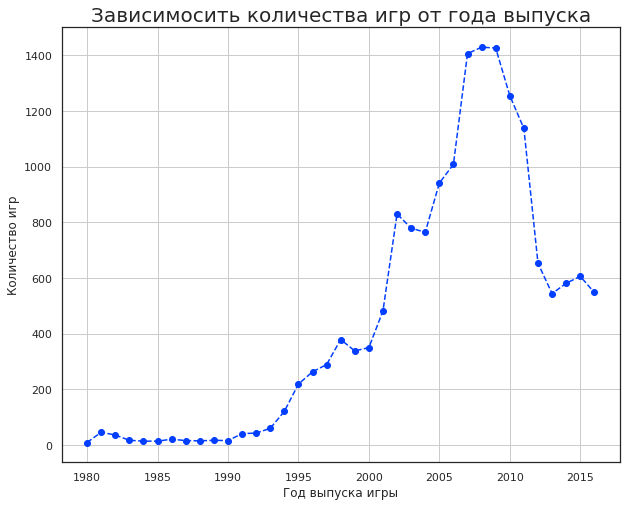

In [36]:
#выделим данные для построения графика
games_by_year = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count').reset_index()

#построим график зависисмости количества игр от года выпуска

fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('Зависимосить количества игр от года выпуска', fontsize = 20)
ax.set_xlabel('Год выпуска игры')
ax.set_ylabel('Количество игр')
ax.grid(True)
ax.plot(games_by_year['year_of_release'], games_by_year['name'], marker='o', linestyle='dashed')
plt.show()


Как видно из графика до 1990г включительно количество выпускаемых игр было близко к нулю. Развитие игровой индустрии активно началось после 1990г, поэтому для дальнейшего анализа можно оставить период с 1990г по настоящее время. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Хороший график вышел. По нему отлично видно то, как ведет себя выпуск платформ с каждым годом

### Распределение продаж в зависимости от платформы

Посмотрим, как менялись продажи по платформам. 

In [37]:
# Список платформ
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [38]:
#Выберем платформы с наибольшими суммарными продажами
pd.pivot_table(data, 
               index = 'platform', 
               values = 'total_sales', 
               aggfunc = 'sum').sort_values(by='total_sales', ascending=False).reset_index().head(10)


,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Рейтинг по суммарным продажм получен

In [39]:
top_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']
# Cгруппируем данные для построения графиков
platform = pd.pivot_table(data, 
                          index = 'year_of_release', 
                          columns = 'platform',
                          values = 'total_sales', aggfunc = 'sum').reset_index()
platform = platform[['year_of_release', 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC' ]].iloc[10:]
platform.tail(10)

platform,year_of_release,PS2,X360,PS3,Wii,DS,PS,GBA,PS4,PSP,PC
27,2007,83.41,105.46,81.50,168.00,148.57,2.98,5.62,NaN,50.94,13.04
28,2008,53.90,135.26,118.52,171.32,145.32,NaN,NaN,NaN,34.56,12.42
29,2009,26.40,120.29,130.93,206.97,119.54,NaN,NaN,NaN,37.78,16.91
30,2010,5.64,170.03,142.17,127.95,85.02,NaN,NaN,NaN,35.04,24.28
31,2011,0.45,143.89,156.78,59.65,26.18,NaN,NaN,NaN,17.82,35.03
32,2012,NaN,99.74,107.36,21.71,11.01,NaN,NaN,NaN,7.69,23.22
33,2013,NaN,88.58,113.25,8.59,1.54,NaN,NaN,25.99,3.14,12.38
34,2014,NaN,34.74,47.76,3.75,NaN,NaN,NaN,100.00,0.24,13.28
35,2015,NaN,11.96,16.82,1.14,NaN,NaN,NaN,118.90,0.12,8.52
36,2016,1.07,1.60,3.60,1.28,1.70,0.30,2.75,69.25,0.50,5.25


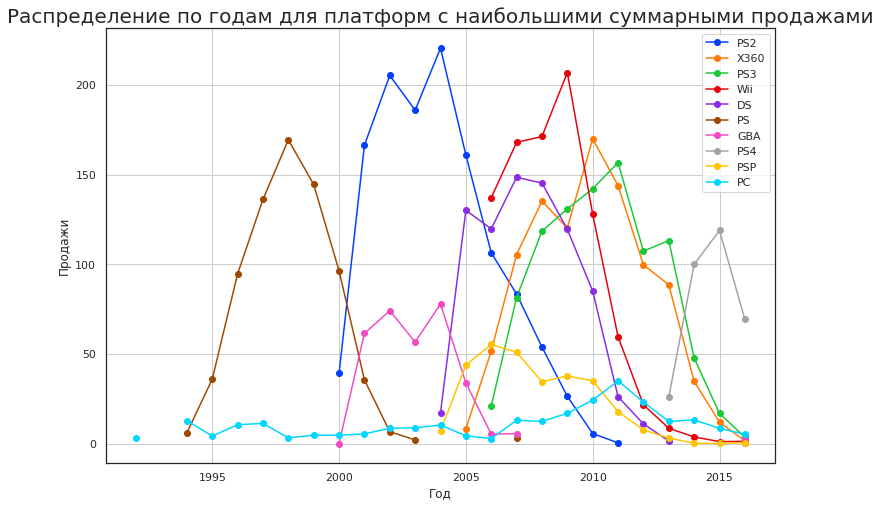

In [40]:
# Построим распределение по годам для платформ с наибольшими суммарными продажами по годам

fig, ax = plt.subplots(figsize = (12,8))

for i in top_platform:
    ax.plot(platform['year_of_release'], platform[i],'o-', label=i)
    
ax.grid(True)
ax.set_title('Распределение по годам для платформ с наибольшими суммарными продажами', fontsize = 20)
ax.set_xlabel('Год')
ax.set_ylabel('Продажи')

ax.legend()
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
По выводу отлично вышло. Платформы, действительно, живут в основнов до 7-8 лет 

На графике видно, средний срок популярности/ "жизни" платформы составляет около 6-10 лет. Лидеры по продолжительности - это PS3 и X360, почти 10 лет. PC - вне времени.

### Прогноз на 2017 год

Итак, для составления прогноза продаж на 2017 год, возьмем данные за последние 3 года. Из этих данных оставим платформы, для которых продажи идут по возрастающей


In [41]:
current_data = data.query('year_of_release >=2014')
current_data.shape

(1735, 12)

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет

Все же прогноз в крупных компаниях правильно считать за последние 2-3 года. А у тебя сфера видеоигр где все быстро меняется и легко отловать отжившие тренды.

<div class="alert alert-block alert-info">
Актуальный период в 3 года рассматривала с самого начала. Но не понравился график распределения по годам. Для той же PS4 и XOne на моем графике видно, что они самые "свежие" платформы. А в периоде 3 года этого не видно и сливаются с 3DS. А потом не учла, что с этими данными еще дальше работать ))) И ранние годы смажут картину. 
    
</div>

Определим какие платформы лидируют по продажам. И выберем несколько потенциально прибыльных.

In [42]:
#Выберем платформы с наибольшими суммарными продажами
current_platform = pd.pivot_table(current_data, 
               index = 'platform', 
               values = 'total_sales', 
               aggfunc = 'sum').sort_values(by='total_sales', ascending=False).reset_index()
current_platform


,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.96
3,PS3,68.18
4,X360,48.30
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,6.17
9,GBA,2.75


Из всего списка оставим топ 6, т.к. разрыв по суммарным продажам между 5 и 6 платформой уже существенный. 

In [43]:
current_platform = current_platform.loc[:5,['platform']]['platform'].to_list()

current_platform

['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU']

In [44]:
# Оставим в исследуемом датафрейме только интересующие платформы
current_data = current_data.query('platform == @current_platform')
current_data['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360'], dtype=object)

In [45]:
# Cгруппируем данные для построения графиков
sales_by_year = pd.pivot_table(current_data, 
                          index = 'year_of_release', 
                          columns = 'platform',
                          values = 'total_sales', aggfunc = 'sum').reset_index()

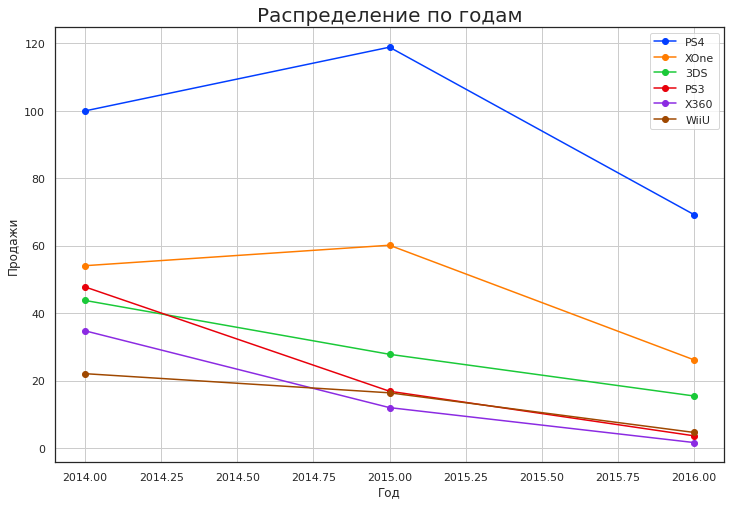

In [46]:
# Построим распределение по годам для данных платформ по годам

fig, ax = plt.subplots(figsize = (12,8))

for i in current_platform:
    ax.plot(sales_by_year['year_of_release'], sales_by_year[i],'o-', label=i)
    
ax.grid(True)
ax.set_title('Распределение по годам', fontsize = 20)
ax.set_xlabel('Год')
ax.set_ylabel('Продажи')

ax.legend()
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Все платформы актуальнго периода имеют падающую тенденцию на графике

За последние 3 года наблюдается спад продаж. Выход новых платформ не превзашел показатели продаж их предшественниц. 

На фоне остальных потенциально выгодными можно считать платформы 
- PS4, 
- XOne. 
- 3DS выделяется на фоне остальных, но есть предположение, что ее пик уже позади. 

### Глобальные продажи игр в разбивке по платформам

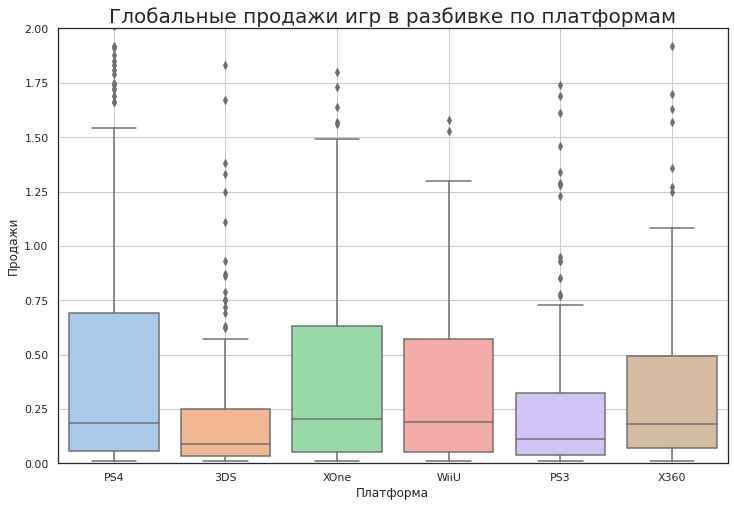

In [47]:
#график по глобальным продажам игр в разбивке по платформам
# по х - платформа 
fig, ax = plt.subplots(figsize = (12,8))  
sns.boxplot(x=current_data['platform'], y=current_data['total_sales'], palette='pastel')
ax.grid(True)
ax.set_title('Глобальные продажи игр в разбивке по платформам', fontsize = 20)
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи')
ax.set_ylim(0,2)

plt.show()

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
А тут вот все идеально, кроме одного. Правильно тут оставить штук 5 наиболее перспективных платформ актуального периода и смотреть только на них

<div class="alert alert-block alert-info">
    Исправила.
</div>

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Тут здорово. Идем далее

График хорошо дополняет ранее полученные данные

Так суммарно с 2011 года платформы лидеры продаж:
- PS3
- X360
- PS4
- XOne
- WiiU

Данный график не отражает какие игры уже на исходе своей популярности, а какие только набирают оборот популярности.

Но с учетом ранее полученной информации, мы знаем, что PS3 и X360 на спаде. В то время как у 3DS есть потенциал к росту.



### Влияние отзывов пользователей и критиов на продажи.

Для анализа влияния оценок критиков и пользователей возьмем одну популярную платформу PS4.
У данной платформы большой объем продаж и достаточно оценок для анализа. 

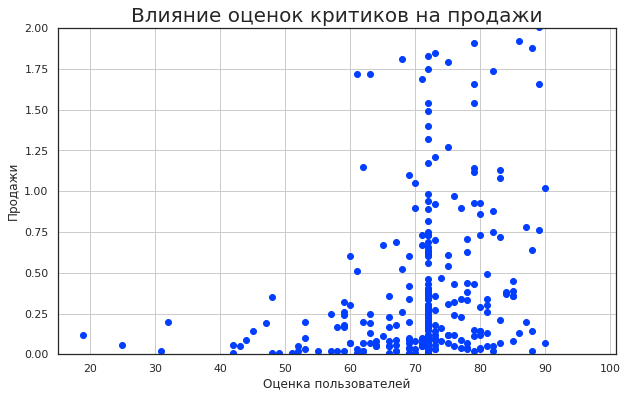

In [48]:
# Построим диаграмму рассеняния зависимости продаж от оценки критиков

fig, ax = plt.subplots(figsize = (10,6))

ax.scatter(x = current_data.query('platform == "PS4"')['critic_score'], y = current_data.query('platform == "PS4"')['total_sales'])
ax.grid(True)
ax.set_title('Влияние оценок критиков на продажи', fontsize = 20)
ax.set_xlabel('Оценка пользователей')
ax.set_ylabel('Продажи')
ax.set_ylim(0, 2)


plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Ты подбираешь самый оптимальный способ показа зависимости одного параметра, от другого на графике.

In [49]:
#Посчитаем среднее значение продаж в зависимости от оценок критиков
data_ps4_critic_score = (current_data.query('platform == "PS4"')
            .groupby('critic_score')['total_sales']
            .mean()
            .to_frame()
            .sort_values(by='critic_score')
            .reset_index())
data_ps4_critic_score.head(5)

,critic_score,total_sales
0,19,0.120
1,25,0.060
2,31,0.020
3,32,0.200
4,42,0.035


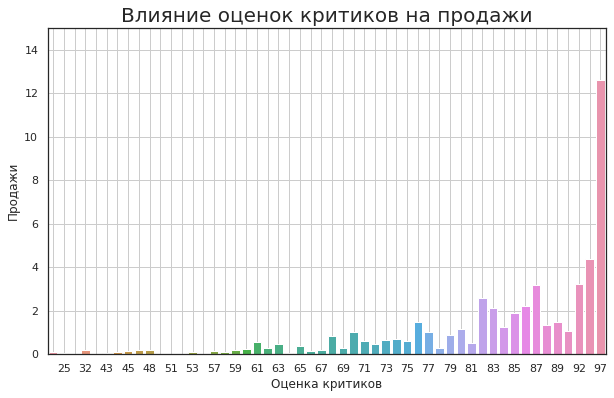

In [50]:
# построим график зависимости продаж от оценки критиков

fig, ax = plt.subplots(figsize = (10,6))

#ax.plot(data_ps4_critic_score['critic_score'], data_ps4_critic_score['total_sales'],'o-')
sns.barplot(x=data_ps4_critic_score['critic_score'], y=data_ps4_critic_score['total_sales'], )
ax.grid(True)
ax.set_title('Влияние оценок критиков на продажи', fontsize = 20)
ax.set_xlabel('Оценка критиков')
ax.set_ylabel('Продажи')
ax.set_ylim(0, 15)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

plt.show()



In [51]:
data_ps4_critic_score.corr()

,critic_score,total_sales
critic_score,1.000000,0.554919
total_sales,0.554919,1.000000


Данные показывают экспонинциальную зависимость продаж от оценок критиков. 



Аналогично посмотрим на влияние оценок пользователей на продажи

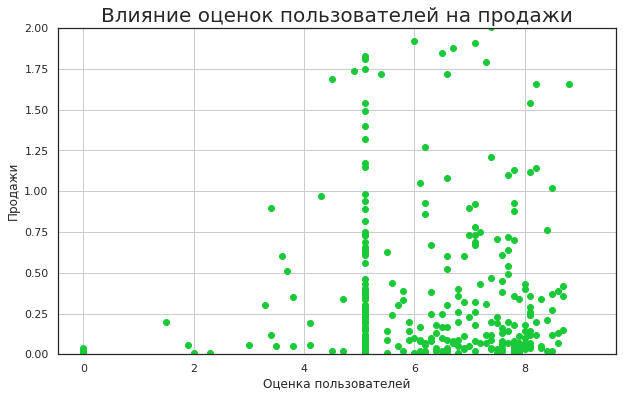

In [52]:
# Построим диаграмму рассеняния зависимости продаж от оценки пользователей

fig, ax = plt.subplots(figsize = (10,6))

ax.scatter(x = current_data.query('platform == "PS4"')['user_score'], y = current_data.query('platform == "PS4"')['total_sales'], color = 'g')
ax.grid(True)
ax.set_title('Влияние оценок пользователей на продажи', fontsize = 20)
ax.set_xlabel('Оценка пользователей')
ax.set_ylabel('Продажи')
ax.set_ylim(0, 2)


plt.show()

In [53]:
data_ps4_user_score = (current_data.query('platform == "PS4"')
            .groupby('user_score')['total_sales']
            .mean()
            .to_frame()
            .sort_values(by='user_score')
            .reset_index())
data_ps4_user_score.head(5)

,user_score,total_sales
0,0.0,0.023333
1,1.5,0.200000
2,1.9,0.060000
3,2.0,0.010000
4,2.3,0.010000


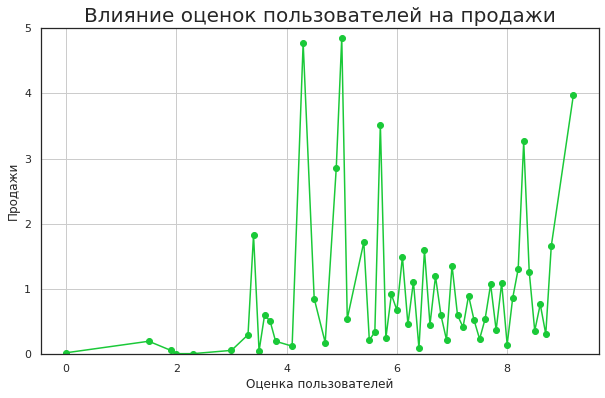

In [54]:
# Построим график зависимости продаж от оценки пользователей

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(data_ps4_user_score['user_score'], data_ps4_user_score['total_sales'],'o-', color='g')
#sns.barplot(x=data_ps4_user_score['user_score'], y=data_ps4_user_score['total_sales'], )
ax.grid(True)
ax.set_title('Влияние оценок пользователей на продажи', fontsize = 20)
ax.set_xlabel('Оценка пользователей')
ax.set_ylabel('Продажи')
ax.set_ylim(0, 5)


plt.show()

In [55]:
data_ps4_user_score.corr()

,user_score,total_sales
user_score,1.000000,0.197057
total_sales,0.197057,1.000000


Данные показывают крайне слабую прямую зависимость между оценками пользователей и продажами игр.

Таким образом, можно сделать вывод, что игры с высокими рейтингами от критиков имееют лучшие продажи. 

При этом влияние рейтинга критиков ощутимо на максимальных оценках (выше 90). А рейтинг пользователей слабо влияет на продажи.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Выводы на основе данных нескольких платформ выглядят убедительно

### Распределение игр по жанрам
Посмотрим на общее распределение игр по жанрам. 

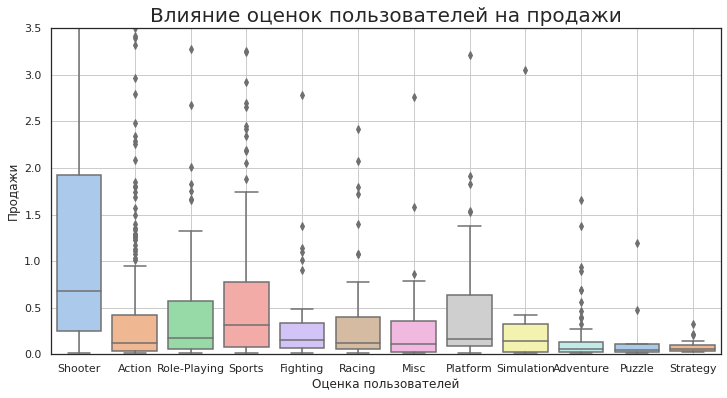

In [56]:
# Построим диаграмму рассеняния зависимости продаж от жанра

fig, ax = plt.subplots(figsize = (12,6))
sns.boxplot(x=current_data['genre'], y=current_data['total_sales'], palette='pastel')
#ax.scatter(x = data['genre'], y = data['total_sales'], color = 'm')
ax.grid(True)
ax.set_title('Влияние оценок пользователей на продажи', fontsize = 20)
ax.set_xlabel('Оценка пользователей')
ax.set_ylabel('Продажи')
ax.set_ylim(0, 3.5)


plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Правильно делаешь, что рассматриваешь выбивающиеся значения. Это наиболее справедливый показатель для определения самого успешного жанра.

In [57]:
data_genre = (current_data.groupby('genre')['total_sales']
              .mean()
              .to_frame()
              .sort_values(by='total_sales', ascending=False)
              .reset_index())
data_genre

,genre,total_sales
0,Shooter,1.551981
1,Sports,0.773188
2,Role-Playing,0.628264
3,Platform,0.540606
4,Fighting,0.537843
5,Racing,0.497593
6,Action,0.405164
7,Misc,0.348202
8,Simulation,0.278333
9,Puzzle,0.179167


Согласно распределению самые продаваемые жанры:
1. Shooter
2. Platform
3. Sports

Самые плохо продаваемые жанры (антирейтинг):
1. Adventure
2. Puzzle
3. Strategy

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
И здесь я согласен с твоими заключениями. 

## Портрет пользователя в зависимости от региона
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [58]:
current_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,72,5.1,NO RATING,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,72,5.1,NO RATING,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,72,5.1,NO RATING,7.98


### Портрет пользователя из Северной Америки

In [59]:
#Top 5 самых популярных платформ

top_platform_na = (current_data.groupby('platform')['na_sales']
 .sum()
 .to_frame()
 .sort_values(by='na_sales', ascending=False)
 .reset_index())
top_platform_na['share_of_sales'] = ((top_platform_na['na_sales']/current_data['na_sales'].sum())*100).round(0)
top_platform_na.head(5)

,platform,na_sales,share_of_sales
0,PS4,98.61,36.0
1,XOne,81.27,30.0
2,X360,28.37,10.0
3,3DS,22.90,8.0
4,PS3,22.05,8.0


In [60]:
#Top 5 самых популярных жанров

top_genre_na = (current_data.groupby('genre')['na_sales']
 .sum()
 .to_frame()
 .sort_values(by='na_sales', ascending=False)
 .reset_index())
top_genre_na['share_of_sales'] = ((top_genre_na['na_sales']/current_data['na_sales'].sum())*100).round(0)
top_genre_na.head(5)

,genre,na_sales,share_of_sales
0,Shooter,76.83,28.0
1,Action,69.83,26.0
2,Sports,45.71,17.0
3,Role-Playing,31.14,11.0
4,Misc,13.22,5.0


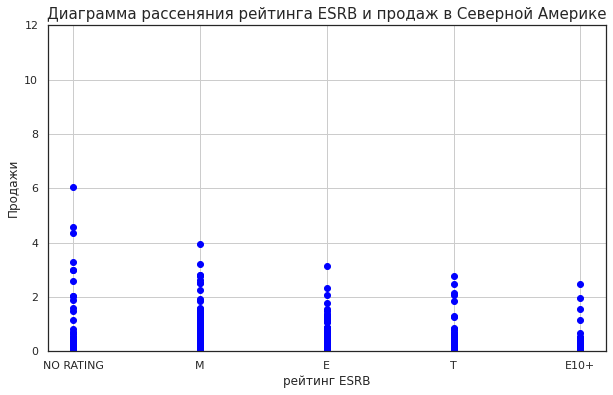

In [61]:
# Построим диаграмму рассеняния зависимости рейтинга ESRB на продажи в Северной Америке

fig, ax = plt.subplots(figsize = (10,6))

ax.scatter(x = current_data['rating'], y = current_data['na_sales'], color = 'blue')
ax.grid(True)
ax.set_title('Диаграмма рассеняния рейтинга ESRB и продаж в Северной Америке', fontsize = 15)
ax.set_xlabel('рейтинг ESRB')
ax.set_ylabel('Продажи')
ax.set_ylim(0, 12)


plt.show()

Можно увидеть небольшую зависимость продаж от рейтинга ESRB:
    - чем старше возрастная группа, тем лучше продажи.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Первичное представление о одном из регионов мы получили. Супер. Идем дальше

### Портрет пользователя из Европы

In [62]:
#Top 5 самых популярных платформ

top_platform_na = (current_data.groupby('platform')['eu_sales']
 .sum()
 .to_frame()
 .sort_values(by='eu_sales', ascending=False)
 .reset_index())
top_platform_na['share_of_sales'] = ((top_platform_na['eu_sales']/current_data['eu_sales'].sum())*100).round(0)
top_platform_na.head(5)

,platform,eu_sales,share_of_sales
0,PS4,130.04,53.0
1,XOne,46.25,19.0
2,PS3,25.54,10.0
3,3DS,16.12,7.0
4,X360,15.49,6.0


In [63]:
#Top 5 самых популярных жанров

top_genre_na = (current_data.groupby('genre')['eu_sales']
 .sum()
 .to_frame()
 .sort_values(by='eu_sales', ascending=False)
 .reset_index())
top_genre_na['share_of_sales'] = ((top_genre_na['eu_sales']/current_data['eu_sales'].sum())*100).round(0)
top_genre_na.head(5)

,genre,eu_sales,share_of_sales
0,Action,69.32,28.0
1,Shooter,61.87,25.0
2,Sports,44.17,18.0
3,Role-Playing,24.91,10.0
4,Racing,13.51,5.0


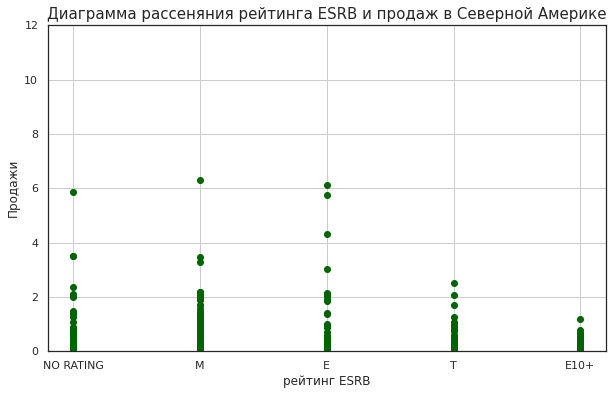

In [64]:
# Построим диаграмму рассеняния зависимости рейтинга ESRB на продажи в Северной Америке

fig, ax = plt.subplots(figsize = (10,6))

ax.scatter(x = current_data['rating'], y = current_data['eu_sales'], color = 'darkgreen')
ax.grid(True)
ax.set_title('Диаграмма рассеняния рейтинга ESRB и продаж в Северной Америке', fontsize = 15)
ax.set_xlabel('рейтинг ESRB')
ax.set_ylabel('Продажи')
ax.set_ylim(0, 12)


plt.show()

Можно увидеть слабую зависимость продаж от рейтинга ESRB:
    - чем старше возрастная группа, тем лучше продажи.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Во-многом Европа похожа на Северную Америку

### Портрет пользователя из Японии

In [65]:
#Top 5 самых популярных платформ

top_platform_na = (current_data.groupby('platform')['jp_sales']
 .sum()
 .to_frame()
 .sort_values(by='jp_sales', ascending=False)
 .reset_index())
top_platform_na['share_of_sales'] = ((top_platform_na['jp_sales']/current_data['jp_sales'].sum())*100).round(0)
top_platform_na.head(5)

,platform,jp_sales,share_of_sales
0,3DS,44.24,57.0
1,PS4,15.02,19.0
2,PS3,11.22,14.0
3,WiiU,7.31,9.0
4,XOne,0.32,0.0


In [66]:
#Top 5 самых популярных жанров

top_genre_na = (current_data.groupby('genre')['jp_sales']
 .sum()
 .to_frame()
 .sort_values(by='jp_sales', ascending=False)
 .reset_index())
top_genre_na['share_of_sales'] = ((top_genre_na['jp_sales']/current_data['jp_sales'].sum())*100).round(0)
top_genre_na.head(5)

,genre,jp_sales,share_of_sales
0,Role-Playing,26.47,34.0
1,Action,24.48,31.0
2,Fighting,5.91,8.0
3,Shooter,4.86,6.0
4,Misc,3.74,5.0


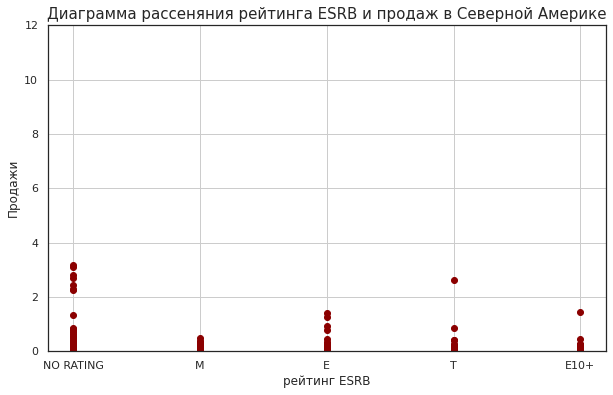

In [67]:
# Построим диаграмму рассеняния зависимости рейтинга ESRB на продажи в Северной Америке

fig, ax = plt.subplots(figsize = (10,6))

ax.scatter(x = current_data['rating'], y = current_data['jp_sales'], color = 'darkred')
ax.grid(True)
ax.set_title('Диаграмма рассеняния рейтинга ESRB и продаж в Северной Америке', fontsize = 15)
ax.set_xlabel('рейтинг ESRB')
ax.set_ylabel('Продажи')
ax.set_ylim(0, 12)


plt.show()

Зависимости от рейтинга ESRB не наблюдается.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Рассмотрев каждый из регионов мы пришли к выводу, что каждый из них имеет свою специфику

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC

- Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные.
- Уровень статистической значимости установим на 5% (.05)

In [68]:
# задаём уровень значимости
alpha = 0.05

print('средний пользовательский рейтинг платформы Xbox One', 
      data.query('platform=="XOne"')['user_score'].mean().round(2))
print('средний пользовательский рейтинг платфмормы PC', 
      data.query('platform=="PC"')['user_score'].mean().round(2))
print("-"*60)
# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу
results = (st.ttest_ind(data.query('platform=="XOne"')['user_score'], 
                        data.query('platform=="PC"')['user_score'], 
                        alternative='two-sided'))

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

средний пользовательский рейтинг платформы Xbox One 5.93
средний пользовательский рейтинг платфмормы PC 6.42
------------------------------------------------------------
p-value: 0.0009164446760254914
Отвергаем нулевую гипотезу


На основании проведенного теста можно полагать, что пользовательские рейтинги платформ Xbox One и PC различны.


Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Гипотезы сформулированы и верно определен метод проверки. С выводами согласен 

### Средние пользовательские рейтинги жанров Action и Sports

- Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.
- Уровень статистической значимости установим на 5% (.05)

In [69]:
# задаём уровень значимости
alpha = 0.05

print('средний пользовательский рейтинг жанра Action', 
      data.query('genre=="Action"')['user_score'].mean().round(2))
print('средний пользовательский рейтинг жанра Sports', 
      data.query('genre=="Sports"')['user_score'].mean().round(2))
print("-"*60)
# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу
results = (st.ttest_ind(data.query('genre=="Action"')['user_score'], 
                        data.query('genre=="Sports"')['user_score'], 
                        alternative='two-sided'))

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

средний пользовательский рейтинг жанра Action 5.59
средний пользовательский рейтинг жанра Sports 5.09
------------------------------------------------------------
p-value: 1.42550352063744e-13
Отвергаем нулевую гипотезу


На основании теста можно сделать вывод, что средние пользовательские рейтинги жанров Action и Sports разные. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Аналогично вышло

## Выводы

Для  интернет-магазина "Стримчик", который продает компьютерные игры по всему миру, было проведено исследование с целью выявления потенциально популярного продукта и планирования рекламной компании.

Исследование проводилось на данных из открытых источников. Данные содержали инфомрацию:
- о продаже игр, 
- оценки пользователей и экспертов, 
- жанры 
- платформы (такие как, Xbox или PlayStation и другие). 

В ходе предварительной оценки данных было установлено, что:

- набор данных достаточен для анализа
- есть пропуски, аномалии и выбросы
- присутсвуют неправильные типы данных
- названия столбцов не соответсвуют стандартам

В ходе обработки данных были обработаны пропуски:
- Строки без названия игр удалены (менее 0.1% от всех данных)
- Пропуски в столбцах с пользовательским рейтингом частично восстановлены из столбца с оценкой критиков, остальные заменены средним значением в зависимости от жанра игры. 
- Пропуски в столбцах с оценкой критиков заменены на средние значения в зависимости от жанра. 
- Пропуски в столбце рейтинга заменены на новую категории "Без рейтинга"

В ходе исследовательского анализа данных было установлено:

- Развитие игровой индустрии (продажи игр) началось после 1990г. 
- За всю историю наблюдений лидерами по продажам стали: PS2, X360, PS3, Wii, DS.
- Время популярности платформ конечно. В среднем от 6 до 10 лет. Но PC при этом остается вне времени.

В качестве прогноза на 2017 год можно отметить следующее:

на фоне остальных потенциально выгодными можно считать игры на платформы 
- PS4, 
- XOne. 
- Так же стоит отметить PC т.к. игры на данную платформу вне времени (не имеют период жизни).
- 3DS выделяется на фоне остальных, но есть предположение, что ее пик уже позади. 
- Стоит обращать внимание на экстремально высокие рейтинги критиков. Такие игры имеют хорошие продажи.
- Но в первую очередь обращать внимание на пользовательские рейтинги. Начиная от 5 и выше игры хорошо продаются.

Согласно распределению самые продаваемые жанры:
1. Shooter
2. Platform
3. Sports

Самые плохо продаваемые жанры (антирейтинг):
1. Adventure
2. Puzzle
3. Strategy

Для пользователей из Северной Америки подойдут игры на платформы:
- X360	
- PS3	
- PS4	

В жанре Action, Shooter, Sports, Role-Playin, Misc. 
Стоит обратить внимание на рейтинг от 10+ и старше.

Для пользователей из Европы подойдут аналогичные платформы, с поправкой на жанры - вместо Misc предпочитают Racing

Для пользователей из Японии в порядке убывания интересны платформы:
- 3DS, 
- PS3,	
- PSP,
- PSV,
- PS4.
Вместо Shooter предпочитают  Fighting.

В ходе проверки гипотез было установлено:
- пользовательские рейтинги платформ Xbox One и PC различны.
- средние пользовательские рейтинги жанров Action и Sports разные.




<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Итоговый вывод стал прекрасным дополнением к проекту. С такими выводами мы смело можем составить прогноз продаж на 2017 год. Уверен, нам точно хватит для этого данных

<div class="alert alert-block alert-info">

## Итоговый комментарии от ревьюера:
    
#### Успех

Поздравляю тебя с выполнением твоего первого Сборного проекта. Мне показалось, что работа выполненна прекрасно и ты здорово постаралась. Понравилось, что ты хорошо владеешь отличными навыками Предобработки данных и проверки Гипотез. А еще особенно ценно, что ты везде пишешь аргументацию своим действиям. Так, если проект попадет в руки незнакомому человеку, он сможет разобраться. Это тебе очень пригодится в будущем.

В проекте осталось пару замечаний:
    
* Промежуточные выводы добавить.
* Ящик с усами доработать.
       
Еще я оставил рекомендации. Очень надеюсь, что ты учтешь их в этом и последующих проектах.
    
    
Жду проект после доработки. Уверен, ты справишься.
</div>

<div class="alert alert-block alert-info">
Вячеслав, благодарю за уделенное время, за ценные советы. Постаралась все учесть и доработать по замечаниям!
</div>